In [1]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

In [48]:
%cd /content/drive/MyDrive/Colab_Notebooks/summerschool2023

/content/drive/MyDrive/Colab_Notebooks/summerschool2023


In [4]:
#Read objective evalution results
df_resyn = pd.read_csv('result/summary_resyn.csv')
df_degraded = pd.read_csv('result/summary_degraded.csv')

## Mean and Standard deviation

In [5]:
df_resyn

,Unnamed: 0,audio_file_name,MCD,F0_PCC,PESQ,MOSNet_MOS
0,0,neutral_sent001_long,3.509604,0.804777,2.780573,2.972
1,1,neutral_sent001_short,2.755415,0.703189,1.569872,3.224
2,2,neutral_sent002_long,4.078117,0.602279,2.166164,3.076
3,3,neutral_sent002_short,2.409424,NaN,2.510628,3.217
4,4,neutral_sent003_long,3.257757,0.738487,2.452163,3.047
5,5,neutral_sent003_short,1.627295,0.999926,3.630932,3.200
6,6,neutral_sent004_long,3.265580,0.858530,2.291985,2.995
7,7,neutral_sent004_short,3.406933,0.953940,2.655897,3.210
8,8,neutral_sent005_long,2.971916,0.895596,1.978069,2.842
9,9,neutral_sent005_short,2.411648,0.962911,2.871550,3.182


In [6]:
df_degraded

,Unnamed: 0,audio_file_name,MCD,F0_PCC,PESQ,MOSNet_MOS
0,0,neutral_sent001_long,4.136829,0.638116,1.135513,3.184
1,1,neutral_sent001_short,3.300431,0.660483,1.106859,3.688
2,2,neutral_sent002_long,4.350548,0.555309,1.100905,3.279
3,3,neutral_sent002_short,2.790921,NaN,2.362273,3.416
4,4,neutral_sent003_long,3.818634,0.608554,1.093348,3.216
5,5,neutral_sent003_short,2.034464,0.989587,1.070583,3.992
6,6,neutral_sent004_long,4.700303,0.728367,1.117639,3.105
7,7,neutral_sent004_short,3.266012,0.774321,1.060411,3.592
8,8,neutral_sent005_long,4.164725,0.652437,1.163138,2.876
9,9,neutral_sent005_short,3.619143,0.929658,1.122771,3.034


In [7]:
metric_names = df_resyn.columns[2:]

print('------------resyn-------------')
for metric_name in metric_names:
  print(f"{metric_name}:"+'  Mean: ' + f"{df_resyn[metric_name].mean():.3}"  + ' Std: ' + f"{df_resyn[metric_name].std():.3}")

print('------------degraded-------------')
for metric_name in metric_names:
  print(f"{metric_name}:"+'  Mean: ' + f"{df_degraded[metric_name].mean():.3}"  + ' Std: ' + f"{df_degraded[metric_name].std():.3}") 

------------resyn-------------
MCD:  Mean: 2.97 Std: 0.696
F0_PCC:  Mean: 0.836 Std: 0.134
PESQ:  Mean: 2.49 Std: 0.559
MOSNet_MOS:  Mean: 3.1 Std: 0.131
------------degraded-------------
MCD:  Mean: 3.62 Std: 0.798
F0_PCC:  Mean: 0.726 Std: 0.147
PESQ:  Mean: 1.23 Std: 0.398
MOSNet_MOS:  Mean: 3.34 Std: 0.337


## Scatter plots

Use scatter plots to see if two methods are correlated

<ipython-input-12-130773f05502>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = df_resyn.append(df_degraded) #resyn: df_resyn; degraded: df_degraded; all: df_resyn.append(df_degraded)


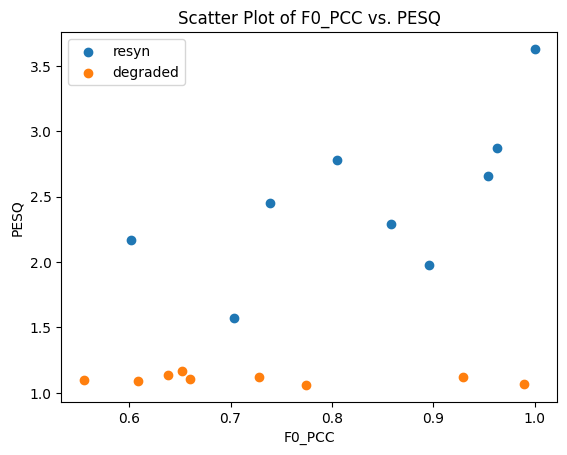

In [12]:
#Choose the model 
result = df_resyn.append(df_degraded) #resyn: df_resyn; degraded: df_degraded; all: df_resyn.append(df_degraded)

#Choose two evaluation metircs: MCD, F0_PCC, PESQ, ViSQOL, MOSNet_MOS
metrics = ['F0_PCC','MCD']

# select columns
x_1 = df_resyn[metrics[0]]
y_1 = df_resyn[metrics[1]]
x_2 = df_degraded[metrics[0]]
y_2 = df_degraded[metrics[1]]

# create scatter plot
plt_1 = plt.scatter(x_1, y_1)
plt_2 = plt.scatter(x_2,y_2)

# add title and axis labels
plt.title(f'Scatter Plot of {metrics[0]} vs. {metrics[1]}')
plt.xlabel(metrics[0])
plt.ylabel(metrics[1])
plt.legend([plt_1, plt_2], ["resyn", "degraded"])

# show plot
plt.show()

## Correlation test

Correlation matrix shows the correlation coefficients between each pair of metrics. The correlation coefficient ranges from -1 to 1, where values close to 1 indicate a strong positive correlation, values close to -1 indicate a strong negative correlation, and values close to 0 indicate little to no correlation.



In [13]:
import pandas as pd

# Assuming you have a DataFrame with the evaluation results
evaluation_results = df_resyn.iloc[:, 2:]

# Calculate the correlation matrix
correlation_matrix = evaluation_results.corr()

# Print the correlation matrix
print(correlation_matrix)


                 MCD    F0_PCC      PESQ  MOSNet_MOS
MCD         1.000000 -0.669225 -0.502489   -0.446088
F0_PCC     -0.669225  1.000000  0.648837    0.143382
PESQ       -0.502489  0.648837  1.000000    0.268551
MOSNet_MOS -0.446088  0.143382  0.268551    1.000000


## long-short analysis

<Axes: title={'center': 'Degraded audios'}, ylabel='Mean Values'>

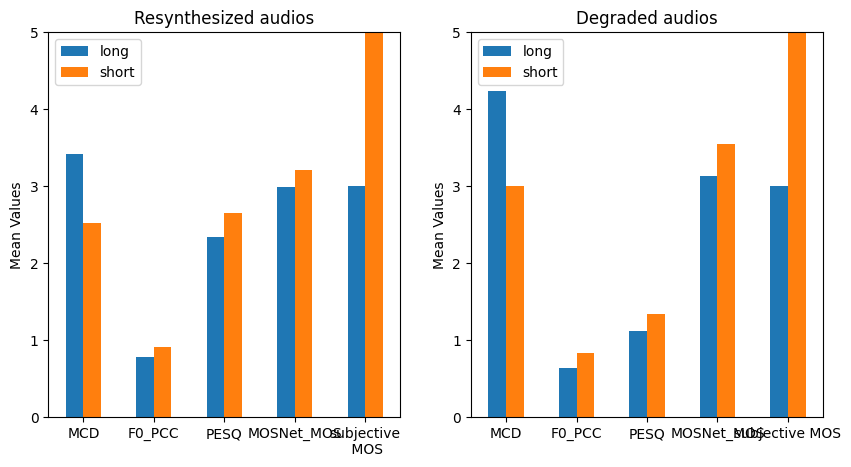

In [38]:
df_resyn_long_mean = df_resyn[df_resyn['audio_file_name'].str.contains('long')].iloc[:, 2:].mean()
df_resyn_short_mean = df_resyn[df_resyn['audio_file_name'].str.contains('short')].iloc[:, 2:].mean()
df_resyn_long_mean['subjective\n MOS'] = 3 # to be replaced by subjective eval result
df_resyn_short_mean['subjective\n MOS'] = 5 # to be replaced by subjective eval result

df_degraded_long_mean = df_degraded[df_degraded['audio_file_name'].str.contains('long')].iloc[:, 2:].mean()
df_degraded_short_mean = df_degraded[df_degraded['audio_file_name'].str.contains('short')].iloc[:, 2:].mean()
df_degraded_long_mean['subjective MOS'] = 3 # to be replaced 
df_degraded_short_mean['subjective MOS'] = 5 # to be replaced

# Set the width of each bar
bar_width = 0.35
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

# create the dataframe
df_resyn_mean = pd.DataFrame({'long': df_resyn_long_mean.values, 'short': df_resyn_short_mean.values}, index=df_resyn_long_mean.index)
df_degraded_mean = pd.DataFrame({'long': df_degraded_long_mean.values, 'short': df_degraded_short_mean.values}, index=df_degraded_long_mean.index)

# plot
df_resyn_mean.plot(kind='bar', rot=0, title='Resynthesized audios', ylabel='Mean Values',ylim=(0,5), ax=ax1)
df_degraded_mean.plot(kind='bar', rot=0, title='Degraded audios', ylabel='Mean Values',ylim=(0,5), ax=ax2)